# Tratamento dos Dados Brutos

### Bibliotecas Necessárias

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### Importar os dados

Depois de importar os dados, é necessário remover as colunas que não serão utilizadas, ou seja, as colunas de identificadores.

Em seguida transformamos as strings de data para valores inteiros.

In [67]:
data = pd.read_csv('data/DMC_2015_orders_train.txt',sep="|")
del data['userID']
del data['orderID']
del data['couponID1']
del data['couponID2']
del data['couponID3']
data['orderTime'] = pd.DatetimeIndex(data['orderTime']).astype('int')
data['couponsReceived'] = pd.DatetimeIndex(data['couponsReceived']).astype('int')

### Criação dos dados para cada classificador

Cada classificador tera seu próprio conjunto de dados e cada um receberá um tratamento para eliminar as informações dos demais.

In [68]:
data_coupon1 = data.copy()
data_coupon2 = data.copy()
data_coupon3 = data.copy()

In [69]:
data_coupon1 = data_coupon1.loc[:,[(x[-1] != '2' and x[-1] != '3') for x in data_coupon1.columns]].iloc[:,:-3]

data_coupon2 = data_coupon2.loc[:,[(x[-1] != '1' and x[-1] != '3') for x in data_coupon2.columns]].iloc[:,:-2]
del data_coupon2['coupon1Used']

data_coupon3 = data_coupon3.loc[:,[(x[-1] != '1' and x[-1] != '2') for x in data_coupon3.columns]].iloc[:,:-1]
del data_coupon3['coupon1Used']
del data_coupon3['coupon2Used']

### Substituir valores categóricos

para cada valor diferente incluir uma nova coluna com valores \[1, 0\] indicando presença ou ausência

In [70]:
data_coupon1 = pd.get_dummies(data_coupon1, columns=["brand1", "productGroup1"])
data_coupon2 = pd.get_dummies(data_coupon2, columns=["brand2", "productGroup2"])
data_coupon3 = pd.get_dummies(data_coupon3, columns=["brand3", "productGroup3"])

In [71]:
vetor1 = [d.split(',') for d in data_coupon1['categoryIDs1']]
categoryIDs1 = set(x for l in vetor1 for x in l)
vetor2 = [d.split(',') for d in data_coupon2['categoryIDs2']]
categoryIDs2 = set(x for l in vetor2 for x in l)
vetor3 = [d.split(',') for d in data_coupon3['categoryIDs3']]
categoryIDs3 = set(x for l in vetor3 for x in l)

In [72]:
d1 = dict()
for c in categoryIDs1:
    d1['categoryIDs1_'+c] = []
for i in vetor1:
    for c in categoryIDs1:
        if c in i:
            d1['categoryIDs1_'+c].append(1.0)
        else:
            d1['categoryIDs1_'+c].append(0)
            
d2 = dict()
for c in categoryIDs2:
    d2['categoryIDs2_'+c] = []
for i in vetor2:
    for c in categoryIDs2:
        if c in i:
            d2['categoryIDs2_'+c].append(1.0)
        else:
            d2['categoryIDs2_'+c].append(0)     
            
d3 = dict()
for c in categoryIDs3:
    d3['categoryIDs3_'+c] = []
for i in vetor3:
    for c in categoryIDs3:
        if c in i:
            d3['categoryIDs3_'+c].append(1.0)
        else:
            d3['categoryIDs3_'+c].append(0)     

In [73]:
data_coupon1 = data_coupon1.join(pd.DataFrame(d1))
del data_coupon1['categoryIDs1']
data_coupon2 = data_coupon2.join(pd.DataFrame(d2))
del data_coupon2['categoryIDs2']
data_coupon3 = data_coupon3.join(pd.DataFrame(d3))
del data_coupon3['categoryIDs3']


In [19]:
del data_coupon1['categoryIDs1']
del data_coupon2['categoryIDs2']
del data_coupon3['categoryIDs3']

In [79]:
data_coupon1.fillna(data_coupon1.mean())
data_coupon2.fillna(data_coupon2.mean())
data_coupon3.fillna(data_coupon3.mean())

def normalize(df):
    return (df - df.min())/(df.max() - df.min())

data_coupon1 = normalize(data_coupon1)
data_coupon2 = normalize(data_coupon2)
data_coupon3 = normalize(data_coupon3)

### Salvar os dados

In [80]:
data_coupon1.to_csv('data/data_coupon1.csv', sep='|')
data_coupon2.to_csv('data/data_coupon2.csv', sep='|')
data_coupon3.to_csv('data/data_coupon3.csv', sep='|')

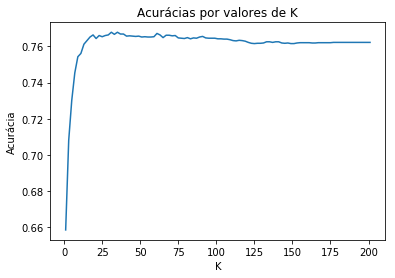

Maior acurácia: 0.767884263742
Melhor k: 35


In [11]:
X = data_coupon1.copy()
del X['coupon1Used']
y = data_coupon1['coupon1Used']
plotAcc(X, y, list(range(1, 203, 2)))

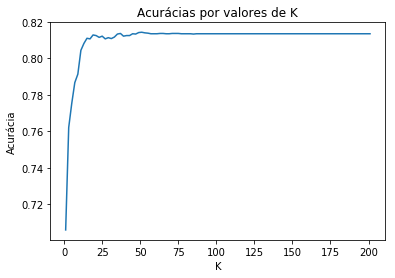

Maior acurácia: 0.814307513232
Melhor k: 51


In [13]:
X = data_coupon2.copy()
del X['coupon2Used']
y = data_coupon2['coupon2Used']
plotAcc(X, y, list(range(1, 203, 2)))

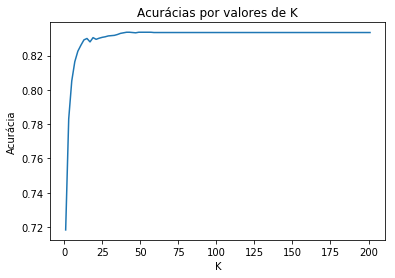

Maior acurácia: 0.833637002171
Melhor k: 41


In [14]:
X = data_coupon3.copy()
del X['coupon3Used']
y = data_coupon3['coupon3Used']
plotAcc(X, y, list(range(1, 203, 2)))